In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_final = pd.read_csv('ETF_cohortes.csv')
df = df_final.copy()
# Mostrar las primeras filas para verificar la carga
if 'df' in locals():
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())


Primeras 5 filas del DataFrame:
  fund_symbol  price_date   open   high    low  close  adj_close     volume  \
0         SPY  1993-01-29  43.97  43.97  43.75  43.94      25.80  1003200.0   
1         SPY  1993-02-01  43.97  44.25  43.97  44.25      25.98   480500.0   
2         SPY  1993-02-02  44.22  44.38  44.12  44.34      26.04   201300.0   
3         SPY  1993-02-03  44.41  44.84  44.38  44.81      26.31   529400.0   
4         SPY  1993-02-04  44.97  45.09  44.47  45.00      26.42   531500.0   

   Clasificacion  Rentabilidad_x  rent_diaria  rent_trimestre  rent_anual  \
0           13.0       16.657364          NaN             NaN         NaN   
1           13.0       16.657364     0.006977             NaN         NaN   
2           13.0       16.657364     0.002309             NaN         NaN   
3           13.0       16.657364     0.010369             NaN         NaN   
4           13.0       16.657364     0.004181             NaN         NaN   

   rent_total_acum  
0       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79688 entries, 0 to 79687
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fund_symbol      79688 non-null  object 
 1   price_date       79688 non-null  object 
 2   open             79688 non-null  float64
 3   high             79688 non-null  float64
 4   low              79688 non-null  float64
 5   close            79688 non-null  float64
 6   adj_close        79688 non-null  float64
 7   volume           79688 non-null  float64
 8   Clasificacion    64715 non-null  float64
 9   Rentabilidad_x   64715 non-null  float64
 10  rent_diaria      79668 non-null  float64
 11  rent_trimestre   78428 non-null  float64
 12  rent_anual       74648 non-null  float64
 13  rent_total_acum  79688 non-null  float64
dtypes: float64(12), object(2)
memory usage: 8.5+ MB


In [ ]:
if 'df' in locals():
    print("--- Información General del DataFrame ---")
    df.info()

    print("\n--- Resumen Estadístico (columnas numéricas) ---")
    print(df.describe())

    print("\n--- Dimensiones del DataFrame (filas, columnas) ---")
    print(df.shape)

    print("\n--- Tipos de Datos por Columna ---")
    print(df.dtypes)
else:
    print("El DataFrame 'df' no se ha cargado. Ejecuta la celda anterior primero.")

--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79688 entries, 0 to 79687
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fund_symbol      79688 non-null  object 
 1   price_date       79688 non-null  object 
 2   open             79688 non-null  float64
 3   high             79688 non-null  float64
 4   low              79688 non-null  float64
 5   close            79688 non-null  float64
 6   adj_close        79688 non-null  float64
 7   volume           79688 non-null  float64
 8   Clasificacion    64715 non-null  float64
 9   Rentabilidad_x   64715 non-null  float64
 10  rent_diaria      79668 non-null  float64
 11  rent_trimestre   78428 non-null  float64
 12  rent_anual       74648 non-null  float64
 13  rent_total_acum  79688 non-null  float64
dtypes: float64(12), object(2)
memory usage: 8.5+ MB

--- Resumen Estadístico (columnas numéricas) ---
          

In [ ]:
if df is not None:
    df.columns = df.columns.str.strip() # Elimina espacios al inicio y al final
    print("\nNombres de columnas después de strip():")
    print(list(df.columns))


Nombres de columnas después de strip():
['fund_symbol', 'price_date', 'open', 'high', 'low', 'close', 'adj_close', 'volume', 'Clasificacion', 'Rentabilidad_x', 'rent_diaria', 'rent_trimestre', 'rent_anual', 'rent_total_acum']


--- Conteo de Valores Nulos por Columna ---
fund_symbol            0
price_date             0
open                   0
high                   0
low                    0
close                  0
adj_close              0
volume                 0
Clasificacion      14973
Rentabilidad_x     14973
rent_diaria           20
rent_trimestre      1260
rent_anual          5040
rent_total_acum        0
dtype: int64


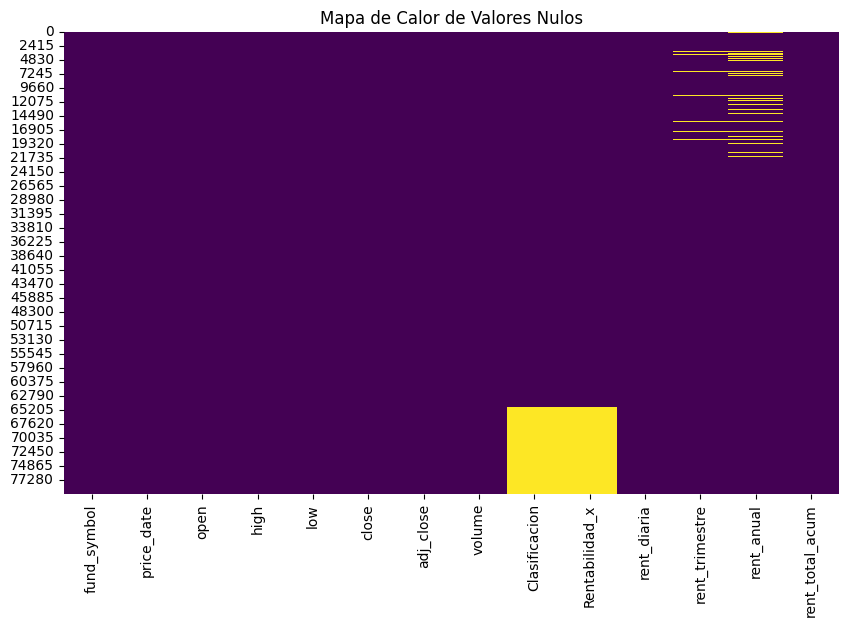


Conteo de nulos después de un posible manejo (si descomentaste alguna estrategia):
fund_symbol            0
price_date             0
open                   0
high                   0
low                    0
close                  0
adj_close              0
volume                 0
Clasificacion      14973
Rentabilidad_x     14973
rent_diaria           20
rent_trimestre      1260
rent_anual          5040
rent_total_acum        0
dtype: int64


In [ ]:
if 'df' in locals():
    print("--- Conteo de Valores Nulos por Columna ---")
    print(df.isnull().sum())

    # Visualización de nulos (opcional, útil para datasets grandes)
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Mapa de Calor de Valores Nulos')
    plt.show()

    # --- Estrategias para manejar nulos (EJEMPLOS - ADAPTAR A TU CASO) ---
    # 1. Eliminar filas con algún valor nulo (usar con precaución)
    # df_cleaned = df.dropna()
    # print(f"\nDimensiones después de dropna(): {df_cleaned.shape}")

    # 2. Rellenar nulos (ej. con la media, mediana, o valor anterior/siguiente para series temporales)
    # Para columnas numéricas, podrías usar la media o mediana:
    # for col in df.select_dtypes(include=np.number).columns:
    #     if df[col].isnull().any():
    #         df[col].fillna(df[col].median(), inplace=True) # O .mean()

    # Para series temporales, 'forward fill' (ffill) o 'backward fill' (bfill) son comunes
    # Asumiendo que tienes datos ordenados por fecha y ETF
    # COLUMNA_PRECIO_EJEMPLO = 'Close' # Reemplaza con tu columna de precio
    # if COLUMNA_PRECIO_EJEMPLO in df.columns and df[COLUMNA_PRECIO_EJEMPLO].isnull().any():
    #     print(f"\nRellenando nulos en '{COLUMNA_PRECIO_EJEMPLO}' con ffill...")
    #     # Podrías necesitar agrupar por ETF si los datos están mezclados
    #     # df[COLUMNA_PRECIO_EJEMPLO] = df.groupby('Ticker_ETF_Columna')[COLUMNA_PRECIO_EJEMPLO].ffill()
    #     df[COLUMNA_PRECIO_EJEMPLO].fillna(method='ffill', inplace=True)
    #     df[COLUMNA_PRECIO_EJEMPLO].fillna(method='bfill', inplace=True) # Para rellenar nulos al inicio si ffill no los cubre

    print("\nConteo de nulos después de un posible manejo (si descomentaste alguna estrategia):")
    print(df.isnull().sum())
else:
    print("El DataFrame 'df' no se ha cargado.")

In [ ]:
if 'df' in locals():
    print("--- Conteo de Filas Duplicadas ---")
    print(f"Número de filas duplicadas: {df.duplicated().sum()}")

    # Mostrar filas duplicadas (si hay pocas)
    print(df[df.duplicated(keep=False)]) # keep=False muestra todas las ocurrencias de duplicados


else:
    print("El DataFrame 'df' no se ha cargado.")

--- Conteo de Filas Duplicadas ---
Número de filas duplicadas: 0
Empty DataFrame
Columns: [fund_symbol, price_date, open, high, low, close, adj_close, volume, Clasificacion, Rentabilidad_x, rent_diaria, rent_trimestre, rent_anual, rent_total_acum]
Index: []


In [ ]:
if 'df' in locals():
    # --- ¡¡¡IMPORTANTÍSIMO!!! REEMPLAZA 'NOMBRE_DE_TU_COLUMNA_FECHA' ---
    # --- CON EL NOMBRE REAL DE TU COLUMNA DE FECHA ---
    COLUMNA_FECHA_REAL = 'price_date' # O 'fecha', 'timestamp', etc. ¡¡¡CÁMBIALO!!!

    if COLUMNA_FECHA_REAL in df.columns:
        print(f"\nTipo de dato original de '{COLUMNA_FECHA_REAL}': {df[COLUMNA_FECHA_REAL].dtype}")
        try:
            # Intenta la conversión directa
            df[COLUMNA_FECHA_REAL] = pd.to_datetime(df[COLUMNA_FECHA_REAL])
            print(f"Tipo de dato de '{COLUMNA_FECHA_REAL}' después de la conversión: {df[COLUMNA_FECHA_REAL].dtype}")

            # Ordenar los datos por símbolo de fondo y fecha, crucial para series temporales
            print(f"\nOrdenando DataFrame por 'fund_symbol' y '{COLUMNA_FECHA_REAL}'...")
            df.sort_values(by=['fund_symbol', COLUMNA_FECHA_REAL], inplace=True)
            print("DataFrame ordenado.")

            # Opcional: Establecer la columna de fecha como índice (muy útil para series temporales SI NO TIENES MÚLTIPLES ETFs o planeas trabajar ETF por ETF)
            # Si tienes múltiples ETFs en el mismo dataframe, un MultiIndex puede ser mejor, o filtrar por ETF antes de poner índice.
            # Por ahora, lo dejaremos como columna para facilitar el agrupamiento por 'fund_symbol'.
            # df.set_index(COLUMNA_FECHA_REAL, inplace=True)

            # Extraer componentes de la fecha (útil para análisis)
            df['Year'] = df[COLUMNA_FECHA_REAL].dt.year
            df['Month'] = df[COLUMNA_FECHA_REAL].dt.month
            df['Day'] = df[COLUMNA_FECHA_REAL].dt.day
            df['DayOfWeek'] = df[COLUMNA_FECHA_REAL].dt.dayofweek # Lunes=0, Domingo=6
            df['WeekOfYear'] = df[COLUMNA_FECHA_REAL].dt.isocalendar().week.astype(int)
            print("\nNuevas columnas de componentes de fecha creadas (Year, Month, Day, DayOfWeek, WeekOfYear).")
            print(df[['fund_symbol', COLUMNA_FECHA_REAL, 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear']].head())

        except Exception as e:
            print(f"Error al convertir la columna '{COLUMNA_FECHA_REAL}' a datetime: {e}")
            print("Verifica el formato de tus fechas. Podrías necesitar especificar el formato, ej: pd.to_datetime(df[COLUMNA_FECHA_REAL], format='%Y-%m-%d')")
    else:
        print(f"ADVERTENCIA: La columna de fecha '{COLUMNA_FECHA_REAL}' no se encontró en el DataFrame.")
        print("El análisis temporal será limitado. Por favor, verifica el nombre de tu columna de fecha.")
else:
    print("El DataFrame 'df' no se ha cargado.")


Tipo de dato original de 'price_date': object
Tipo de dato de 'price_date' después de la conversión: datetime64[ns]

Ordenando DataFrame por 'fund_symbol' y 'price_date'...
DataFrame ordenado.

Nuevas columnas de componentes de fecha creadas (Year, Month, Day, DayOfWeek, WeekOfYear).
      fund_symbol price_date  Year  Month  Day  DayOfWeek  WeekOfYear
59086        AMER 2020-10-16  2020     10   16          4          42
59106        AMER 2020-10-19  2020     10   19          0          43
59126        AMER 2020-10-20  2020     10   20          1          43
59146        AMER 2020-10-21  2020     10   21          2          43
59166        AMER 2020-10-22  2020     10   22          3          43



--- Análisis Univariado: Columnas Numéricas ---


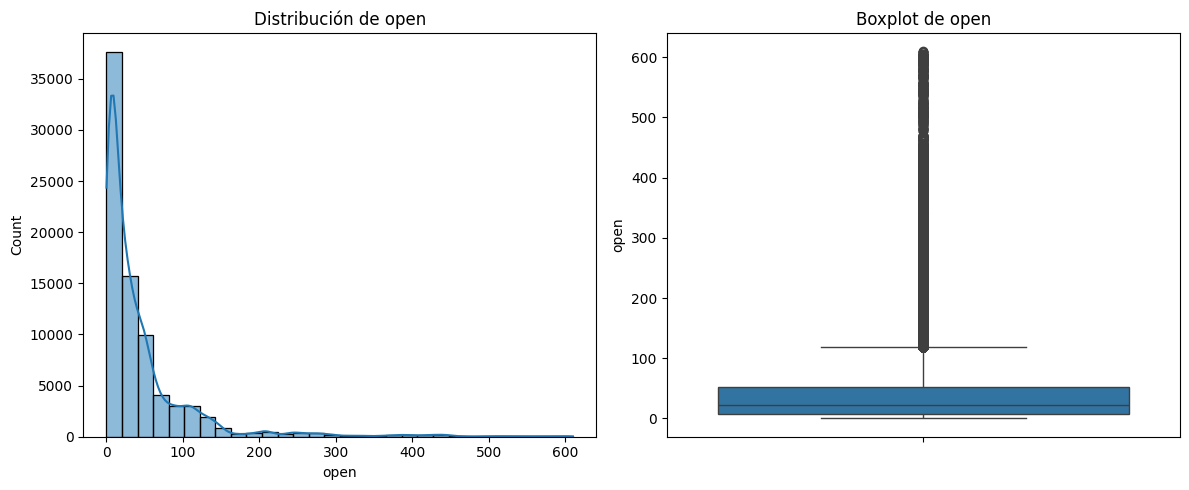

Estadísticas descriptivas para 'open':
count    79688.000000
mean        45.368085
std         69.139842
min          0.210000
25%          7.919466
50%         22.720000
75%         52.102841
max        609.705872
Name: open, dtype: float64
------------------------------


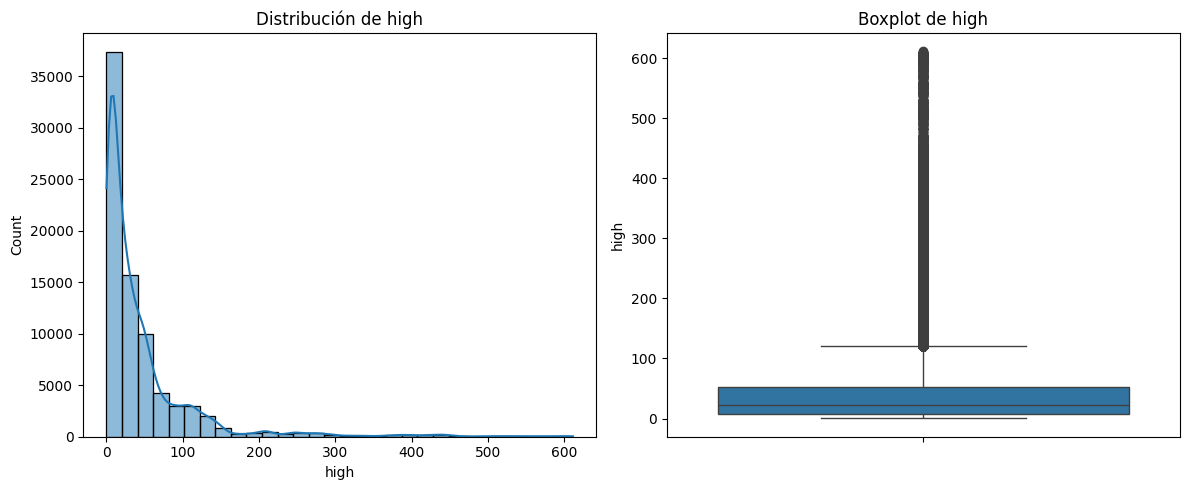

Estadísticas descriptivas para 'high':
count    79688.000000
mean        45.867254
std         69.555635
min          0.230000
25%          8.060000
50%         23.070000
75%         52.780000
max        611.390763
Name: high, dtype: float64
------------------------------


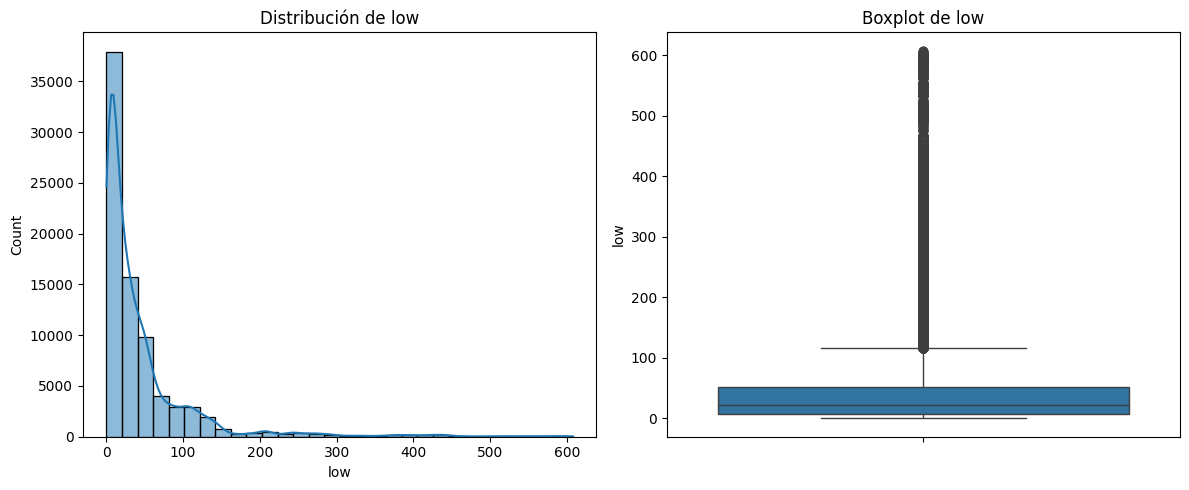

Estadísticas descriptivas para 'low':
count    79688.000000
mean        44.799779
std         68.669244
min          0.200000
25%          7.740000
50%         22.300000
75%         51.310000
max        607.731787
Name: low, dtype: float64
------------------------------


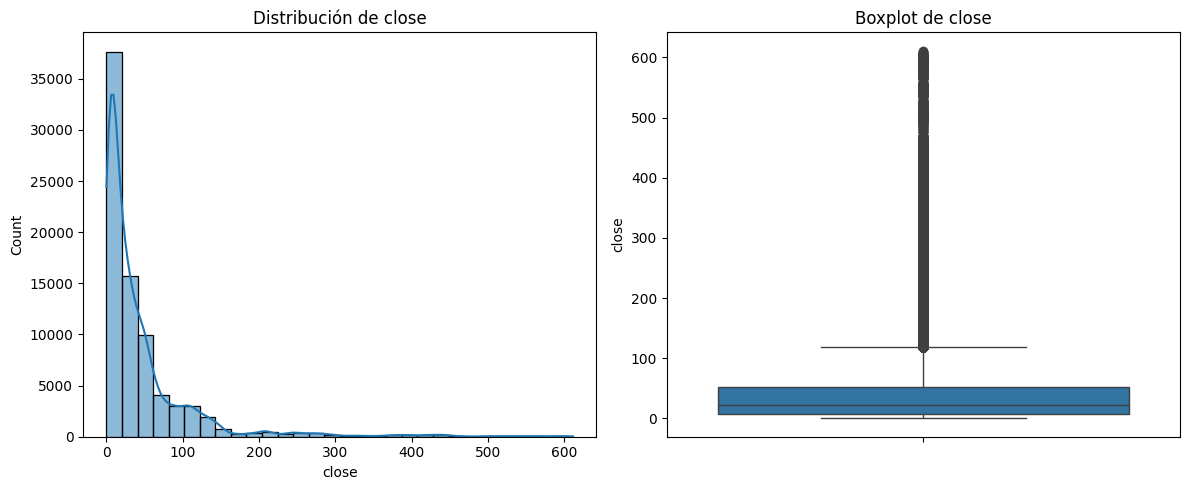

Estadísticas descriptivas para 'close':
count    79688.000000
mean        45.359124
std         69.140344
min          0.200000
25%          7.900000
50%         22.711441
75%         52.060000
max        611.091675
Name: close, dtype: float64
------------------------------


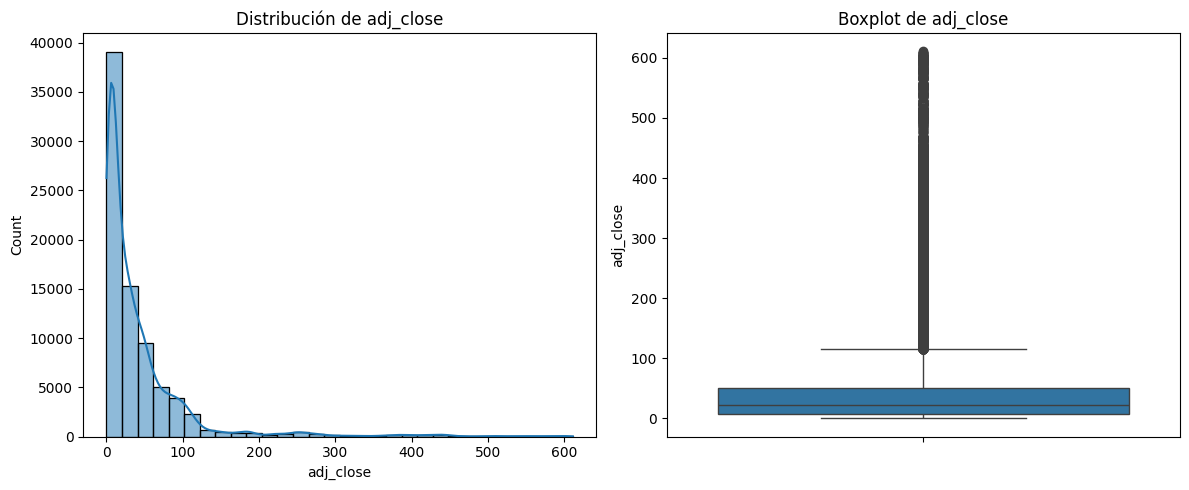

Estadísticas descriptivas para 'adj_close':
count    79688.000000
mean        42.432996
std         66.815452
min          0.150000
25%          7.330000
50%         21.409910
75%         50.510000
max        611.091675
Name: adj_close, dtype: float64
------------------------------


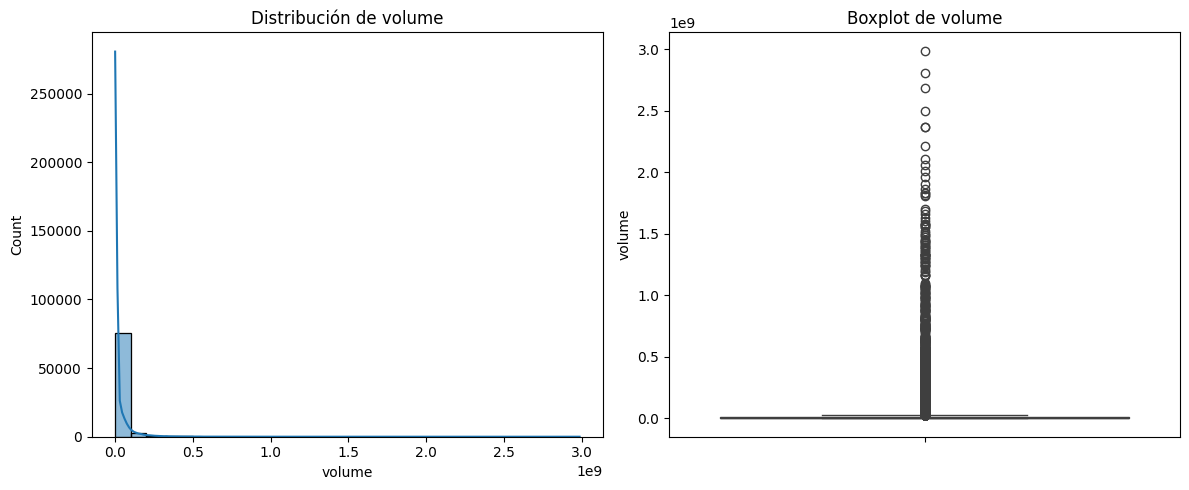

Estadísticas descriptivas para 'volume':
count    7.968800e+04
mean     2.168466e+07
std      7.707516e+07
min      0.000000e+00
25%      7.580000e+04
50%      1.270800e+06
75%      1.135890e+07
max      2.987062e+09
Name: volume, dtype: float64
------------------------------


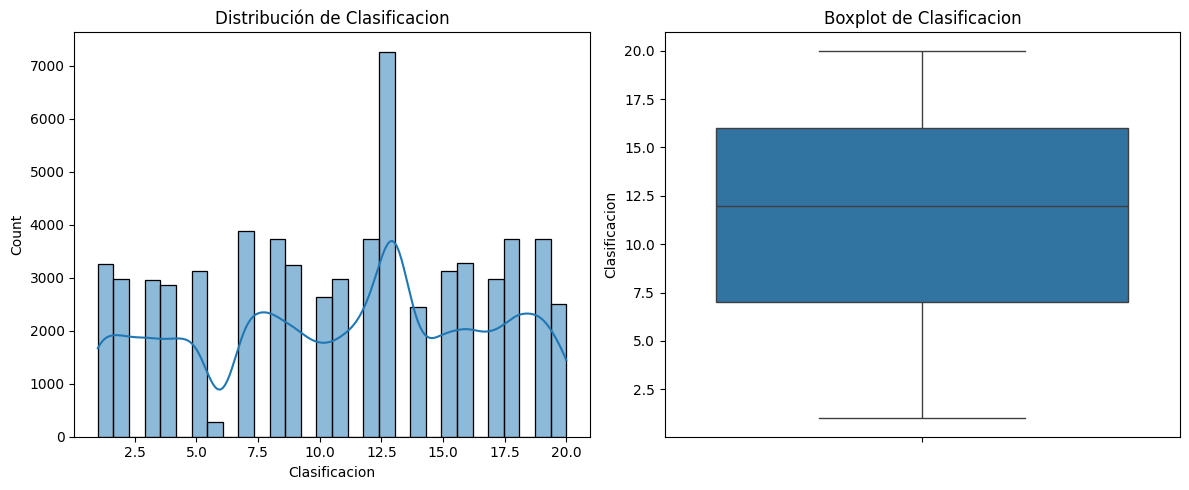

Estadísticas descriptivas para 'Clasificacion':
count    64715.000000
mean        10.872734
std          5.620142
min          1.000000
25%          7.000000
50%         12.000000
75%         16.000000
max         20.000000
Name: Clasificacion, dtype: float64
------------------------------


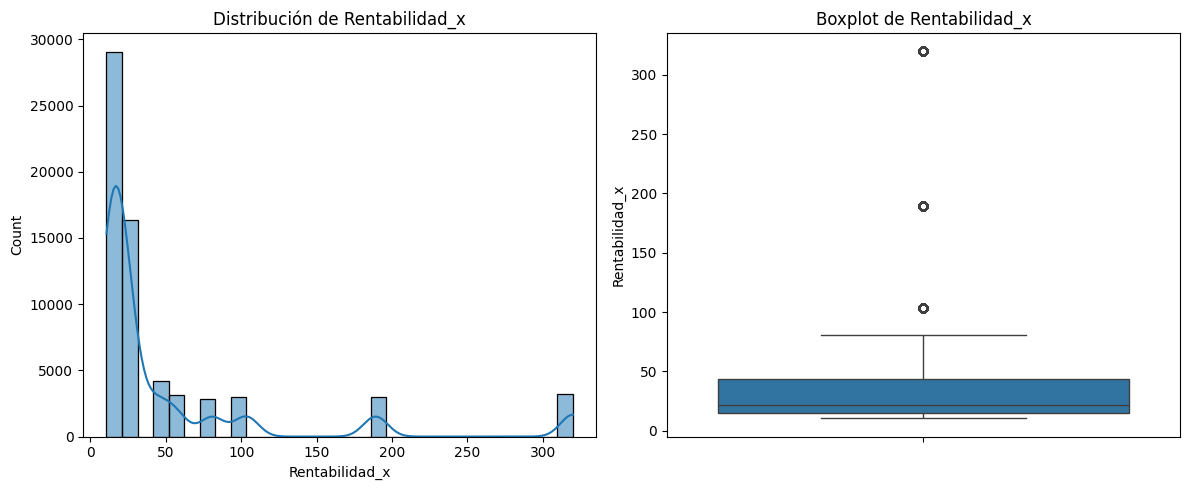

Estadísticas descriptivas para 'Rentabilidad_x':
count    64715.000000
mean        50.928451
std         74.035653
min         10.601979
25%         14.748538
50%         21.439834
75%         43.472081
max        319.880000
Name: Rentabilidad_x, dtype: float64
------------------------------


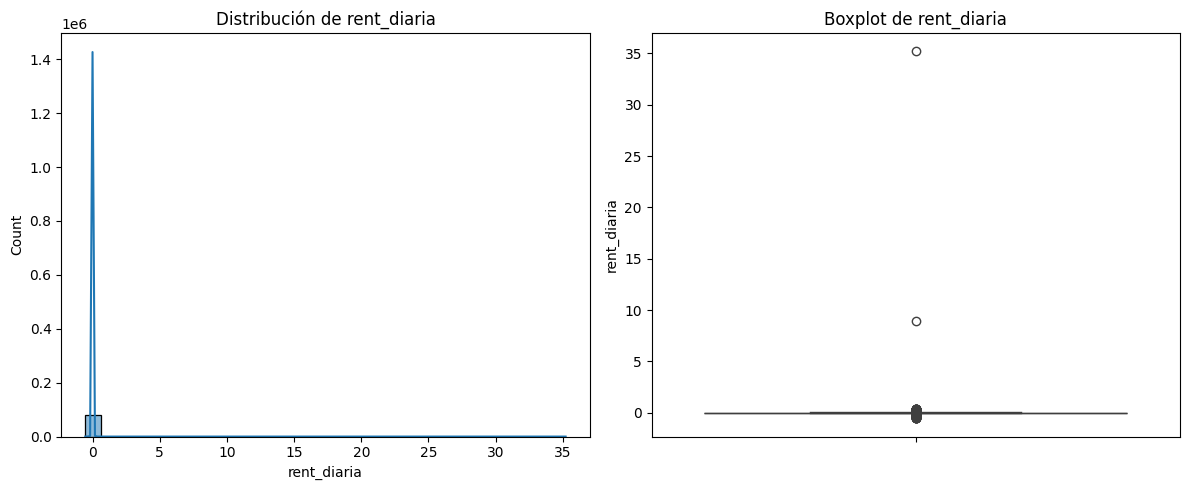

Estadísticas descriptivas para 'rent_diaria':
count    79668.000000
mean         0.001831
std          0.133150
min         -0.540170
25%         -0.012171
50%          0.001531
75%          0.016024
max         35.208955
Name: rent_diaria, dtype: float64
------------------------------


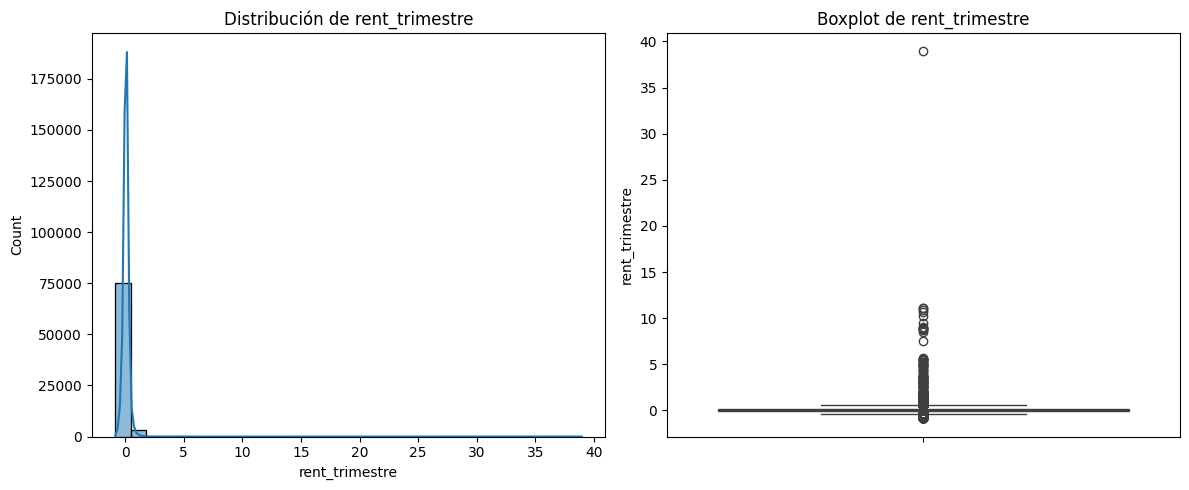

Estadísticas descriptivas para 'rent_trimestre':
count    78428.000000
mean         0.079137
std          0.321285
min         -0.845363
25%         -0.044346
50%          0.068945
75%          0.192379
max         38.940299
Name: rent_trimestre, dtype: float64
------------------------------


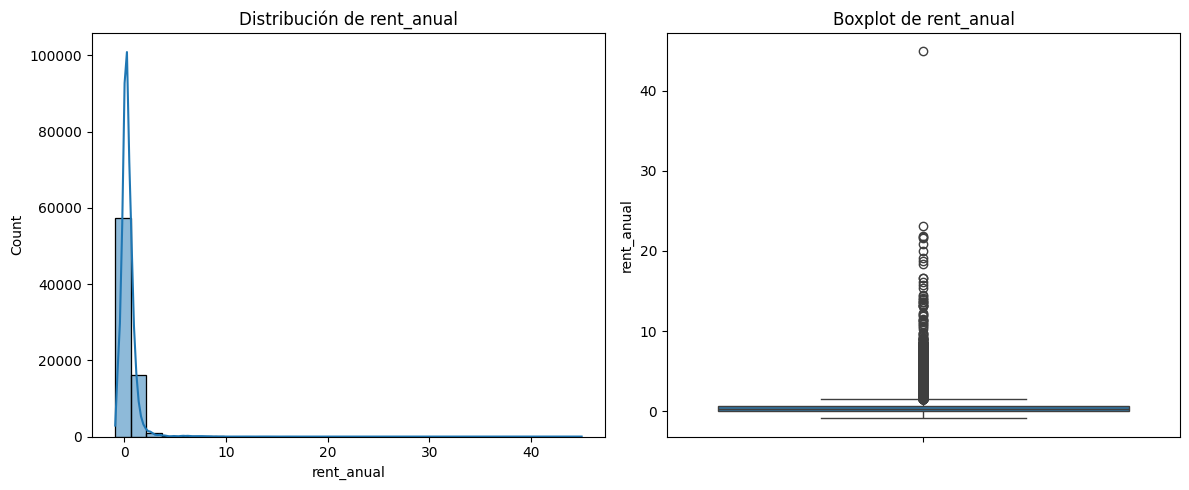

Estadísticas descriptivas para 'rent_anual':
count    74648.000000
mean         0.350908
std          0.812273
min         -0.899310
25%         -0.038607
50%          0.241029
75%          0.597219
max         44.970149
Name: rent_anual, dtype: float64
------------------------------


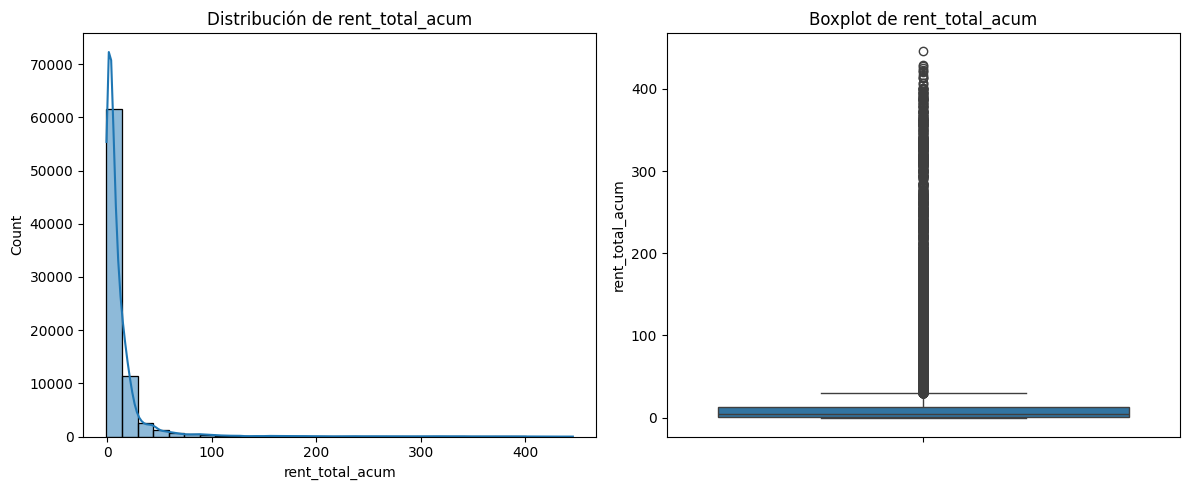

Estadísticas descriptivas para 'rent_total_acum':
count    79688.000000
mean        12.753068
std         31.084230
min         -0.842324
25%          1.258065
50%          4.828992
75%         12.858455
max        445.855438
Name: rent_total_acum, dtype: float64
------------------------------


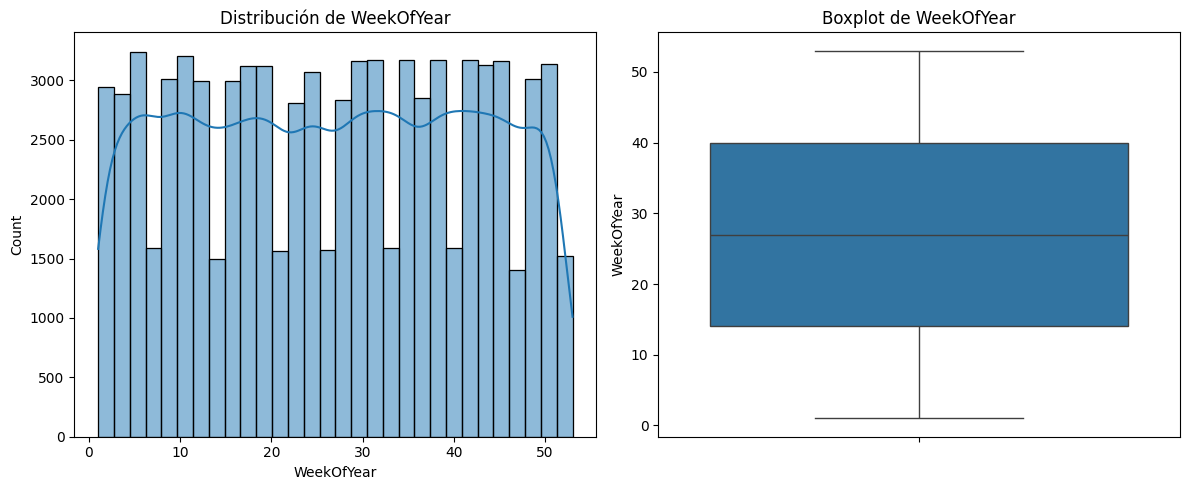

Estadísticas descriptivas para 'WeekOfYear':
count    79688.000000
mean        26.595711
std         14.996714
min          1.000000
25%         14.000000
50%         27.000000
75%         40.000000
max         53.000000
Name: WeekOfYear, dtype: float64
------------------------------


In [ ]:
if 'df' in locals():
    print("\n--- Análisis Univariado: Columnas Numéricas ---")
    # --- REEMPLAZA CON TUS COLUMNAS NUMÉRICAS RELEVANTES ---
    # Ej: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
    columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()
    # Excluir componentes de fecha si ya los extrajiste y no quieres histogramas de ellos
    columnas_numericas = [col for col in columnas_numericas if col not in ['Year', 'Month', 'Day', 'DayOfWeek']]

    for col in columnas_numericas:
        if col in df.columns:
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            sns.histplot(df[col], kde=True, bins=30)
            plt.title(f'Distribución de {col}')

            plt.subplot(1, 2, 2)
            # Reset the index before creating the boxplot to avoid duplicate index issues
            sns.boxplot(y=df.reset_index()[col])
            plt.title(f'Boxplot de {col}')

            plt.tight_layout()
            plt.show()

            print(f"Estadísticas descriptivas para '{col}':")
            print(df[col].describe())
            print("-" * 30)
        else:
            print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")
else:
    print("El DataFrame 'df' no se ha cargado.")


--- Análisis Univariado: Columnas Categóricas ---

Análisis de la columna categórica: fund_symbol
fund_symbol
SPY     8082
QLD     4708
ROM     4554
RXL     4554
USD     4554
UCC     4553
TNA     4099
TECL    4072
MIDU    4066
UPRO    3950
DRN     3936
UMDD    3791
UDOW    3791
TQQQ    3791
SOXL    3772
RETL    3686
CURE    3453
SMH     3322
FRAK    2440
AMER     514
Name: count, dtype: int64


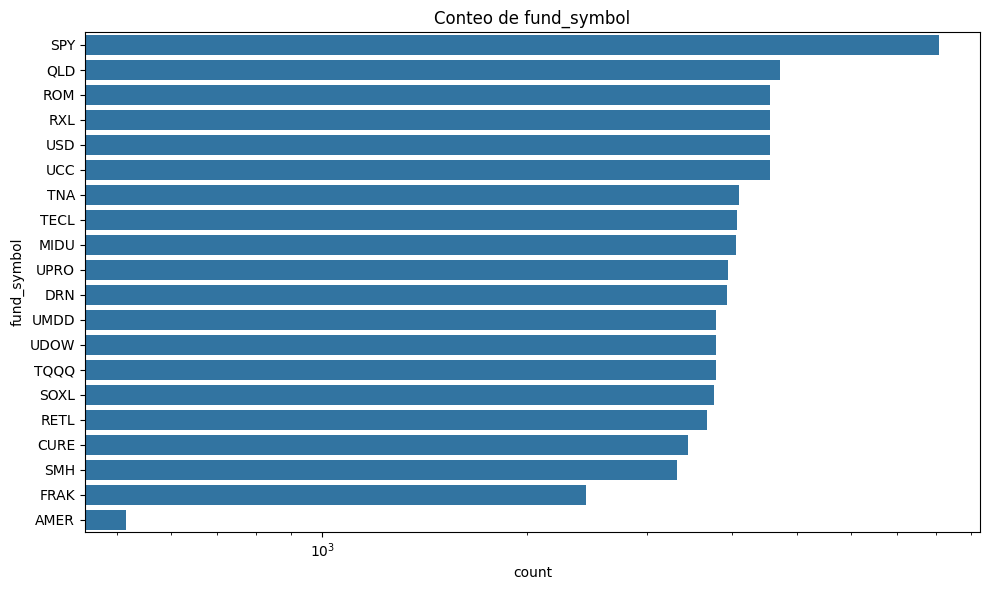

------------------------------


In [ ]:
if 'df' in locals():
    print("\n--- Análisis Univariado: Columnas Categóricas ---")
    # --- REEMPLAZA 'columna_ticker_etf' CON EL NOMBRE DE TU COLUMNA DE IDENTIFICACIÓN DE ETF ---
    # Y cualquier otra columna categórica relevante (ej. 'Sector', 'Cohorte_Nombre')
    columnas_categoricas = df.select_dtypes(include='object').columns.tolist()
    # También puedes añadir columnas que, aunque sean numéricas, representan categorías (ej. códigos)
    # O si 'Year', 'Month' fueron creadas como int pero quieres ver sus cuentas
    # columnas_categoricas.extend(['Year', 'Month']) # Ejemplo

    # --- REEMPLAZA 'Ticker' CON EL NOMBRE REAL DE TU COLUMNA DE TICKER/IDENTIFICADOR DE ETF ---
    COLUMNA_TICKER_ETF = 'Ticker' # O 'ETF_Name', 'Symbol', etc.
    if COLUMNA_TICKER_ETF not in columnas_categoricas and COLUMNA_TICKER_ETF in df.columns:
        columnas_categoricas.append(COLUMNA_TICKER_ETF)


    for col in columnas_categoricas:
        if col in df.columns:
            print(f"\nAnálisis de la columna categórica: {col}")
            print(df[col].value_counts(dropna=False)) # dropna=False para incluir nulos en el conteo

            # Graficar si hay un número razonable de categorías únicas
            if df[col].nunique() < 30 and df[col].nunique() > 1:
                plt.figure(figsize=(10, 6))
                sns.countplot(y=df[col], order=df[col].value_counts().index)
                plt.title(f'Conteo de {col}')
                plt.xscale('log') # Usar escala logarítmica si hay mucha disparidad
                plt.tight_layout()
                plt.show()
            elif df[col].nunique() == 1:
                print(f"La columna '{col}' tiene un solo valor único.")
            else:
                print(f"La columna '{col}' tiene {df[col].nunique()} valores únicos, omitiendo gráfico de conteo detallado.")
            print("-" * 30)
        else:
            print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

else:
    print("El DataFrame 'df' no se ha cargado.")


--- Análisis de Series Temporales ---
ETFs encontrados: ['AMER' 'CURE' 'DRN' 'FRAK' 'MIDU' 'QLD' 'RETL' 'ROM' 'RXL' 'SMH' 'SOXL'
 'SPY' 'TECL' 'TNA' 'TQQQ' 'UCC' 'UDOW' 'UMDD' 'UPRO' 'USD']


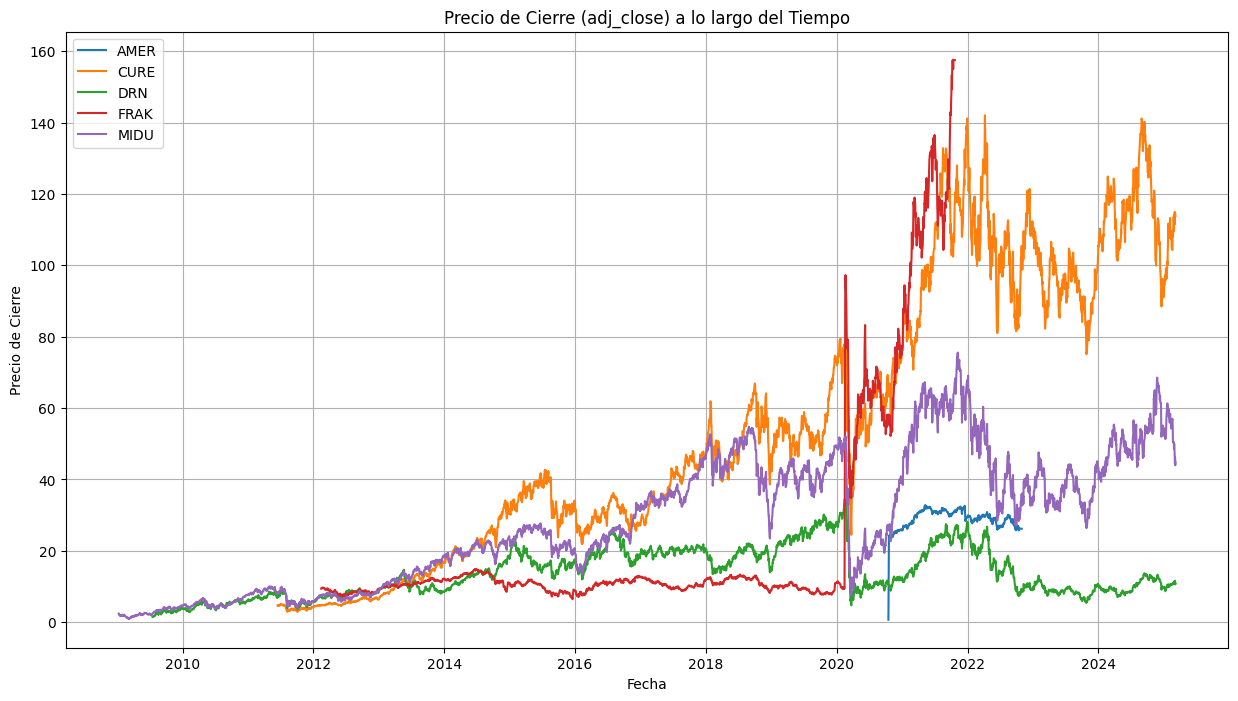

In [ ]:
if 'df' in locals():
    print("\n--- Análisis de Series Temporales ---")
    # --- REEMPLAZA CON LOS NOMBRES REALES DE TUS COLUMNAS ---
    COLUMNA_FECHA = 'price_date'         # Ya definida, pero por claridad
    COLUMNA_PRECIO_CIERRE = 'adj_close' # O 'Adj Close'
    COLUMNA_TICKER_ETF = 'fund_symbol'   # Identificador del ETF

    if COLUMNA_FECHA in df.columns and COLUMNA_PRECIO_CIERRE in df.columns and COLUMNA_TICKER_ETF in df.columns:
        # Asegurarse de que la fecha esté ordenada
        df_sorted = df.sort_values(by=[COLUMNA_TICKER_ETF, COLUMNA_FECHA])

        # Graficar el precio de cierre a lo largo del tiempo para cada ETF (o algunos seleccionados)
        etfs_unicos = df_sorted[COLUMNA_TICKER_ETF].unique()
        print(f"ETFs encontrados: {etfs_unicos}")

        plt.figure(figsize=(15, 8))
        # Si tienes muchos ETFs, considera graficar solo algunos o un promedio
        num_etfs_a_graficar = min(len(etfs_unicos), 5) # Graficar hasta 5 ETFs

        for etf in etfs_unicos[:num_etfs_a_graficar]:
            df_etf = df_sorted[df_sorted[COLUMNA_TICKER_ETF] == etf]
            plt.plot(df_etf[COLUMNA_FECHA], df_etf[COLUMNA_PRECIO_CIERRE], label=etf)

        plt.title(f'Precio de Cierre ({COLUMNA_PRECIO_CIERRE}) a lo largo del Tiempo')
        plt.xlabel('Fecha')
        plt.ylabel('Precio de Cierre')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Si quieres graficar un ETF específico:
        # ETF_ESPECIFICO = 'SPY' # Reemplaza con un ticker de tu dataset
        # if ETF_ESPECIFICO in etfs_unicos:
        #     plt.figure(figsize=(15, 7))
        #     df_specific_etf = df_sorted[df_sorted[COLUMNA_TICKER_ETF] == ETF_ESPECIFICO]
        #     plt.plot(df_specific_etf[COLUMNA_FECHA], df_specific_etf[COLUMNA_PRECIO_CIERRE])
        #     plt.title(f'Precio de Cierre de {ETF_ESPECIFICO}')
        #     plt.xlabel('Fecha')
        #     plt.ylabel('Precio')
        #     plt.grid(True)
        #     plt.show()

    else:
        print(f"Asegúrate de que las columnas '{COLUMNA_FECHA}', '{COLUMNA_PRECIO_CIERRE}', y '{COLUMNA_TICKER_ETF}' existen.")

else:
    print("El DataFrame 'df' no se ha cargado.")


--- Análisis Bivariado: Matriz de Correlación ---


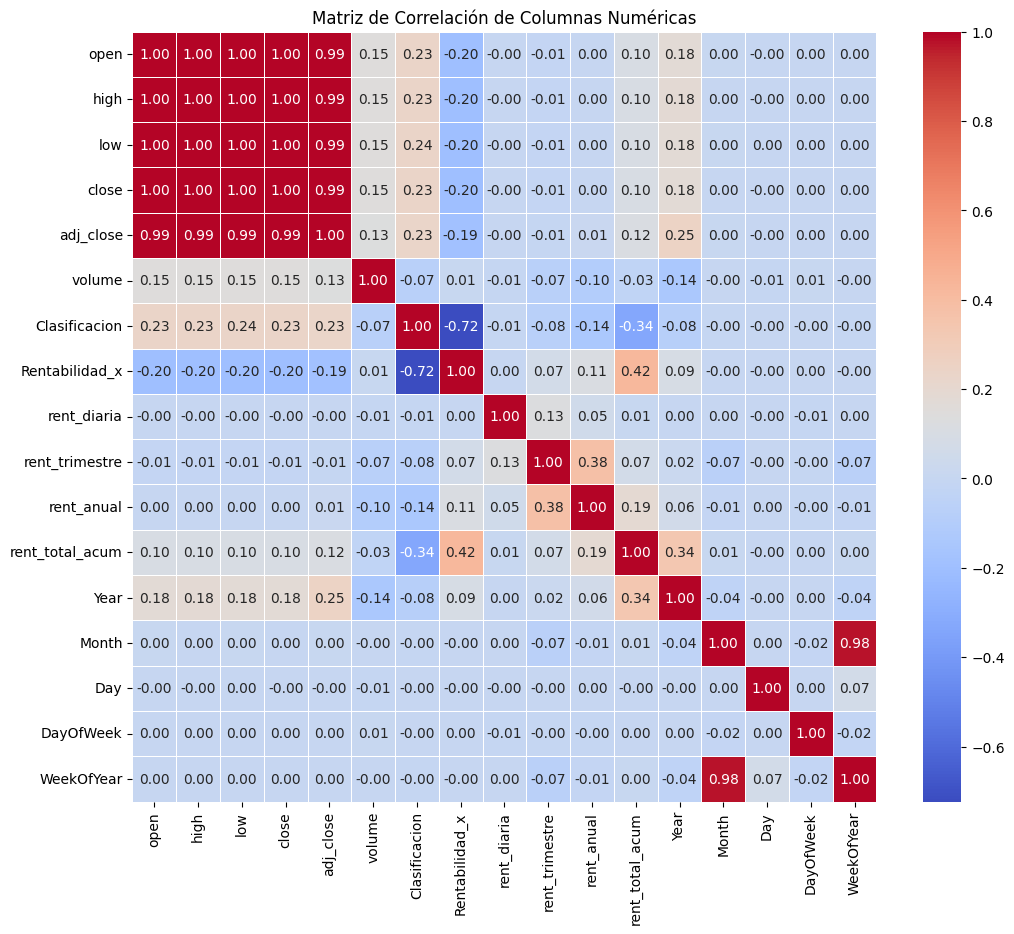


Pares con mayor correlación (absoluta):
high   open     0.999942
open   high     0.999942
low    close    0.999932
close  low      0.999932
       high     0.999918
high   close    0.999918
low    open     0.999912
open   low      0.999912
       close    0.999871
close  open     0.999871
dtype: float64


In [ ]:
if 'df' in locals():
    print("\n--- Análisis Bivariado: Matriz de Correlación ---")
    # Seleccionar solo columnas numéricas para la correlación
    columnas_numericas_corr = df.select_dtypes(include=np.number).columns.tolist()

    if len(columnas_numericas_corr) > 1:
        matriz_correlacion = df[columnas_numericas_corr].corr()

        plt.figure(figsize=(12, 10))
        sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Matriz de Correlación de Columnas Numéricas')
        plt.show()

        print("\nPares con mayor correlación (absoluta):")
        # Desapilar la matriz, ordenar y mostrar los más altos (excluyendo auto-correlaciones de 1)
        corr_pairs = matriz_correlacion.unstack().sort_values(kind="quicksort", ascending=False)
        corr_pairs = corr_pairs[corr_pairs != 1.0] # Excluir auto-correlaciones
        print(corr_pairs.head(10))
    else:
        print("No hay suficientes columnas numéricas para calcular una matriz de correlación.")

else:
    print("El DataFrame 'df' no se ha cargado.")

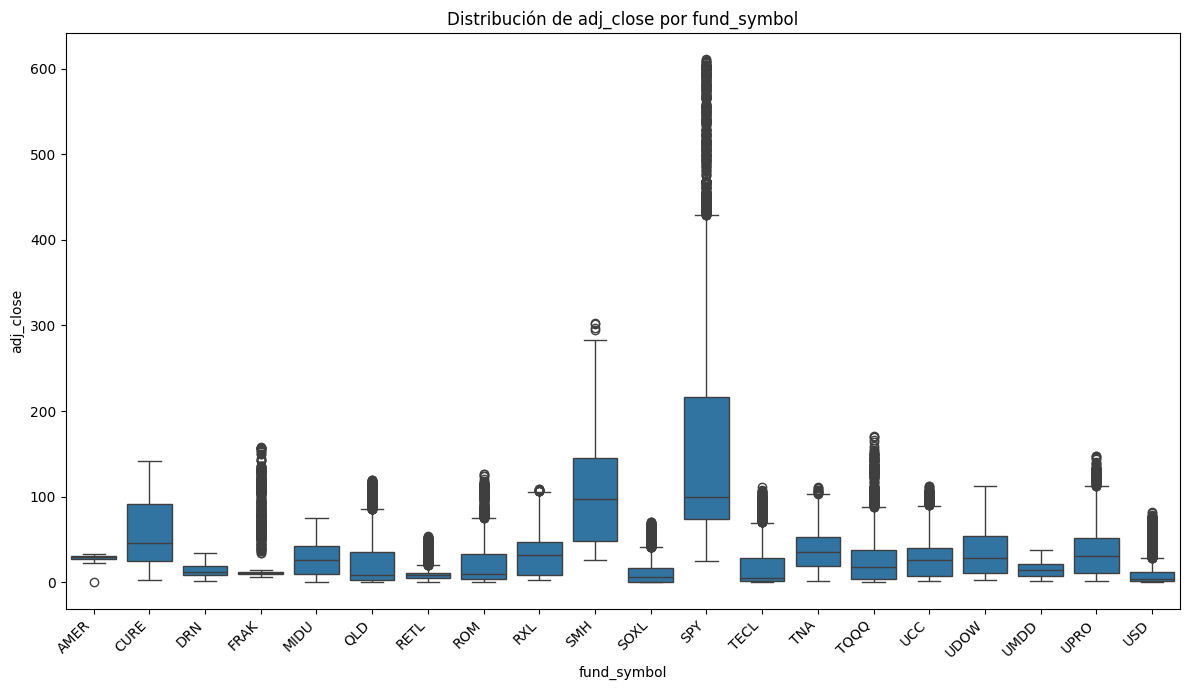

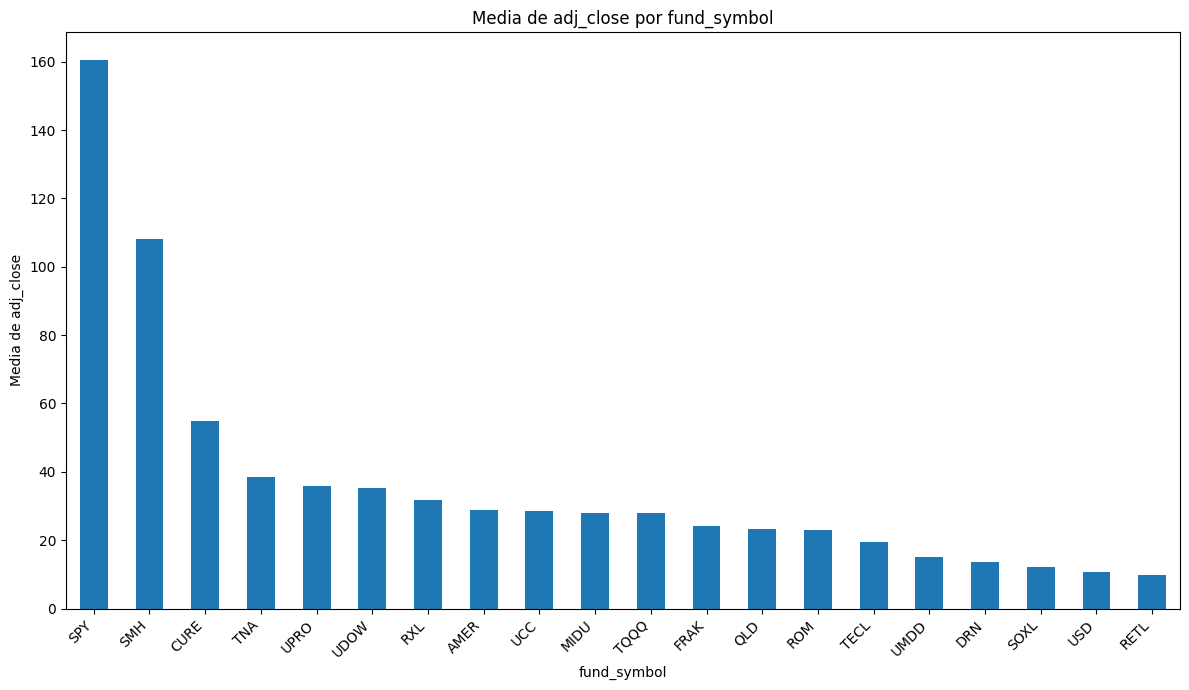

In [ ]:
if 'df' in locals():
    # --- REEMPLAZA 'COLUMNA_COHORTE_EJEMPLO' SI TIENES UNA COLUMNA DE AGRUPACIÓN ---
    # --- Y 'COLUMNA_PRECIO_CIERRE' CON TU COLUMNA DE PRECIO ---
    COLUMNA_COHORTE_EJEMPLO = 'fund_symbol' # O 'Sector', o incluso 'Ticker' para ver precios medios por ETF
    COLUMNA_PRECIO_CIERRE = 'adj_close'

    if COLUMNA_COHORTE_EJEMPLO in df.columns and COLUMNA_PRECIO_CIERRE in df.columns:
        if df[COLUMNA_COHORTE_EJEMPLO].nunique() < 30 and df[COLUMNA_COHORTE_EJEMPLO].nunique() > 1 : # Para no graficar demasiadas categorías
            plt.figure(figsize=(12, 7))
            sns.boxplot(x=COLUMNA_COHORTE_EJEMPLO, y=COLUMNA_PRECIO_CIERRE, data=df)
            plt.title(f'Distribución de {COLUMNA_PRECIO_CIERRE} por {COLUMNA_COHORTE_EJEMPLO}')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(12, 7))
            df.groupby(COLUMNA_COHORTE_EJEMPLO)[COLUMNA_PRECIO_CIERRE].mean().sort_values(ascending=False).plot(kind='bar')
            plt.title(f'Media de {COLUMNA_PRECIO_CIERRE} por {COLUMNA_COHORTE_EJEMPLO}')
            plt.ylabel(f'Media de {COLUMNA_PRECIO_CIERRE}')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"La columna '{COLUMNA_COHORTE_EJEMPLO}' tiene demasiadas ({df[COLUMNA_COHORTE_EJEMPLO].nunique()}) o muy pocas categorías para esta visualización.")
    else:
        print(f"Asegúrate de que las columnas '{COLUMNA_COHORTE_EJEMPLO}' y '{COLUMNA_PRECIO_CIERRE}' existen para el análisis numérico vs categórico.")
else:
    print("El DataFrame 'df' no se ha cargado.")